In [61]:
library(tidyverse)
library(lubridate)

### The Dataset

* YERockfish.csv contains measurements of fish collected from along the Oregon coast

  * Yelloweye Rockfish (Sebastes rubberimus)
  
* Length (length; to the nearest cm),
* Age (years)
* Maturity (Immature and Mature) state of female  

* Read in the data as a tibble


In [62]:
# read in YERockfish data as tibble
raw_data = read_csv("YERockfish.csv")
head(raw_data)

Parsed with column specification:
cols(
  date = col_character(),
  length = col_double(),
  age = col_double(),
  maturity = col_character(),
  stage = col_character()
)



date,length,age,maturity,stage
9/2/2003,31,10,Immature,1
10/7/2002,32,6,Immature,1
7/18/2000,32,11,Immature,1
6/11/2001,32,11,Immature,2
8/8/2000,32,13,Immature,2
10/4/2003,33,9,Immature,1


* This data contains a date column. R provides an easy way to manipulate dates.
  * The field needs to be converted to a format that R will recognize as a date. 
    * The `as.POSIXct()` function does this conversion. The function takes two arguments
      * The column to convert
      * Format of the date. Since dates come in vairous shapes (ex. yyyy/m/d, mm/dd/yy, etc..)

* Use the function `as.POSIXct()` to convert the date. The approach is exactly the same as converting to factor (`as.factor()`) or integer (`as.integer()`)
  * Here you can pass the following format string for the parameter `format`
    * `%m/%d/%Y`
    
 * Bonus: use a `dplyr` pipeline to mutate the column

In [63]:
# convert the date column
format_data <- raw_data %>%
    mutate(date = as.POSIXct(date, format = "%m/%d/%Y"))

* Use the function `head()` on your modified `tibble` to make sure the column is now of type `dttm` (date and time) instead of `char`

In [64]:
# make sure column is of type dttm (date and time) instead of char
head(format_data)

date,length,age,maturity,stage
2003-09-02,31,10,Immature,1
2002-10-07,32,6,Immature,1
2000-07-18,32,11,Immature,1
2001-06-11,32,11,Immature,2
2000-08-08,32,13,Immature,2
2003-10-04,33,9,Immature,1


* Count the number of lines in your file

In [65]:
# number of lines 
nrow(format_data)

[1] 158

* Plot the count of observations per year.
 * Note that you can easily parse the year from the data using the `year()` function, which takes a column of `dttm`  datatype
 * The function year is part of the `lubridate` package, which you may need to import 
* Hint 1: try the function `year()` on your date column
* Hint 2: Use group by to group the data and `n()` to count the number of entries in each group

* Bonus: use a `dplyr` pipeline to answer this question.

In [66]:
# Try year() on the date colum
year(format_data$date)

[1] 2003 2002 2000 2001 2000 2003 2000 2002 2000 2000 2000 2002 2000 2000 2003
 [16] 2000 2003 2000 2000 2000 2002 2002 2000 2000 2002 2002 2003 2000 2000 2002
 [31] 2002 2001 2003 2001 2002 2003 2002 2003 2000 2000 2000 2002 2001 2003 2002
 [46] 2003 2003 2000 2000 2003 2002 2000 2003 2000 2001 2001 2002 2002 2002 2002
 [61] 2003 2003 2002 2002 2002 2003 2001 2002 2001 2003 2002 2003 2000 2000 2003
 [76] 2000 2000 2003 2003 2000 2003 2000 2000 2002 2003 2002 2002 2002 2002 2003
 [91] 2003 2002 2002 2004 2003 2000 2001 2008 2002 2002 2002 2002 2001 2000 2003
[106] 2003 2002 2003 2002 2002 2000 2002 2000 2002 2002 2003 2003 2002 2002 2003
[121] 2003 2002 2002 2003 2002 2002 2001 2002 2002 2002 2004 2003 2000 2003 2004
[136] 2000 2002 2002 2002 2002 2003 2003 2002 2002 2003 2002 2003 2003 2002 2001
[151] 2000 2001 2003 2002 2002 2002 2002 2001

year,sample_size
2000,37
2001,14
2002,61
2003,42
2004,3
2008,1


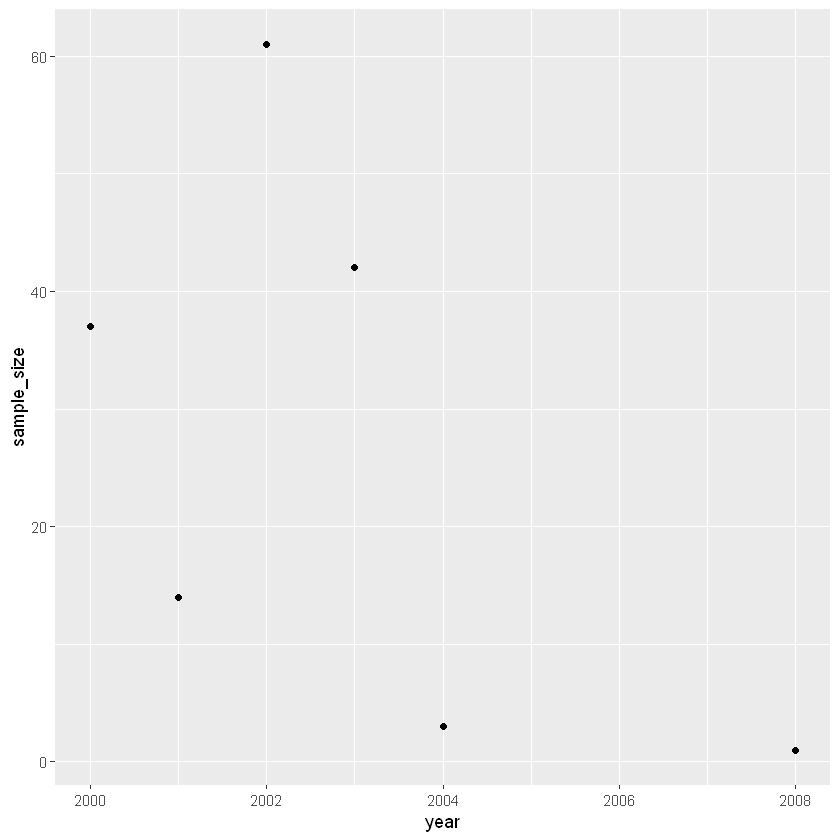

In [67]:
# entries per group
counts = format_data %>% 
    mutate(year = year(date)) %>%                
    group_by(year) %>%
    summarise(sample_size = n())
counts

ggplot(counts) +
  geom_point(mapping = aes(year, sample_size))

* Remove all entries that belong to a year for which there are less than 5 entries
  * E.g. there is only one entry for 2008, so we can remove it. 
* Save the data to a new tibble

In [68]:
# remove years with less than 5 entries  
survey_yr = format_data %>% 
    mutate(year = year(date))
head(survey_yr)

filter_data_yr <- subset(survey_yr, year !=2004 & year != 2008)
head(filter_data_yr)

date,length,age,maturity,stage,year
2003-09-02,31,10,Immature,1,2003
2002-10-07,32,6,Immature,1,2002
2000-07-18,32,11,Immature,1,2000
2001-06-11,32,11,Immature,2,2001
2000-08-08,32,13,Immature,2,2000
2003-10-04,33,9,Immature,1,2003


date,length,age,maturity,stage,year
2003-09-02,31,10,Immature,1,2003
2002-10-07,32,6,Immature,1,2002
2000-07-18,32,11,Immature,1,2000
2001-06-11,32,11,Immature,2,2001
2000-08-08,32,13,Immature,2,2000
2003-10-04,33,9,Immature,1,2003


* Count the number of entries and make sure there are less observations 

In [69]:
# number of entries 
nrow(filter_data_yr)

[1] 154

* Model the fish maturity using the fish length 
  * i.e. predict maturity from the lengh data

* You can make any changes to the data needed to build this model

In [70]:
### model fish maturity using fish length

# 1. data without 2004 and 2008
filter_data_yr

date,length,age,maturity,stage,year
2003-09-02,31,10,Immature,1,2003
2002-10-07,32,6,Immature,1,2002
2000-07-18,32,11,Immature,1,2000
2001-06-11,32,11,Immature,2,2001
2000-08-08,32,13,Immature,2,2000
2003-10-04,33,9,Immature,1,2003
2000-07-17,33,10,Immature,1,2000
2002-08-18,34,8,Immature,1,2002
2000-07-12,34,10,Immature,1,2000
2000-07-25,34,11,Immature,1,2000


In [71]:
# 2. remove missing values
length_mat = filter_data_yr %>%
  select(length, maturity) %>%
  filter(!is.na(maturity))
head(length_mat)

length,maturity
31,Immature
32,Immature
32,Immature
32,Immature
32,Immature
33,Immature


In [72]:
# 3. convert 'maturity' characters to integers; Immature=0, Mature=1
length_mat$maturity = ifelse(length_mat$maturity=="Immature",0,1)
length_mat$maturity = as.factor(length_mat$maturity)
num_maturity = as.numeric(levels(length_mat$maturity))[length_mat$maturity]

In [73]:
# 4. predict maturity from length data
log_reg_model = glm(data=length_mat, maturity~length, family="binomial")
summary(log_reg_model)


Call:
glm(formula = maturity ~ length, family = "binomial", data = length_mat)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.15581   0.00611   0.14947   0.30604   1.76274  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -18.73094    3.65351  -5.127 2.95e-07 ***
length        0.48375    0.09094   5.320 1.04e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 144.669  on 143  degrees of freedom
Residual deviance:  66.296  on 142  degrees of freedom
AIC: 70.296

Number of Fisher Scoring iterations: 7


In [74]:
beta_0 = log_reg_model$coefficients[1]
beta_1 = log_reg_model$coefficients[2]
x_axis = seq(min(length_mat$length)-3, max(length_mat$length)+3, 0.05)
g_x = 1 / (1+exp(-(beta_0 + beta_1 * x_axis)))

* Generate a plot to show the data and the fit of the model (sigmoid)

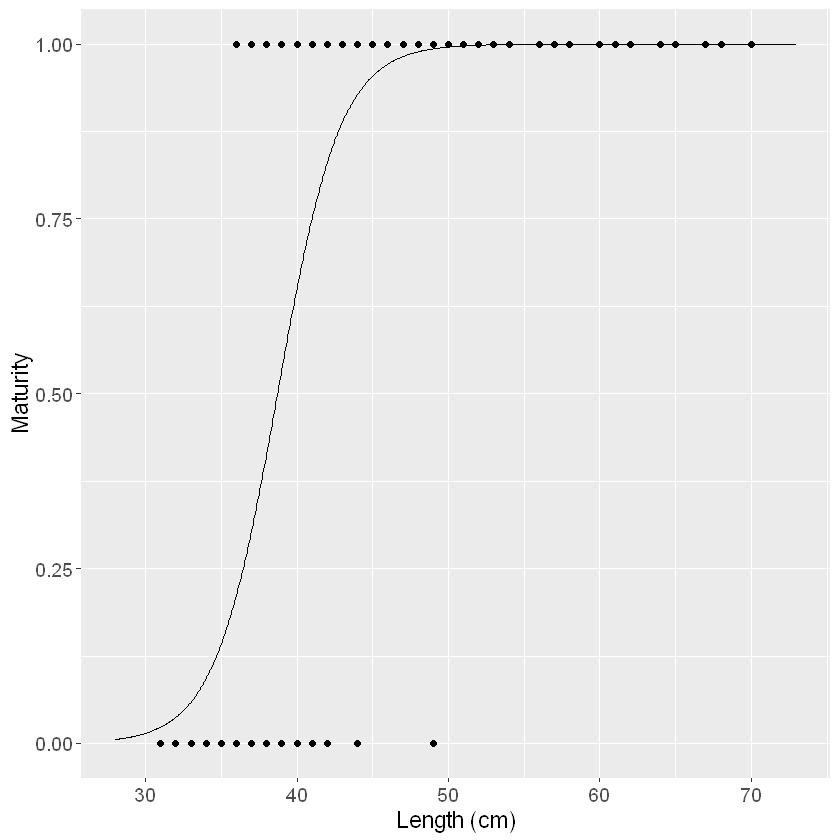

In [75]:
# plot with model fit (sigmoid)
ggplot()+ 
  geom_point(aes(x=length_mat$length, y=num_maturity)) + 
  geom_line(aes(x_axis, g_x)) +
  xlab("Length (cm)") +
  ylab("Maturity") +
  theme(text = element_text(size = 14))

* What is the length at which the probability of picking a mature fish is 0.5? 
  * You can eyeball it or can you compute it formally from the logistic regression

In [76]:
### length with 0.5 propability picking mature fish
# from visual estimation, there is a 50% chance of picking a mature fish with length of ~38cm 

# using logistic regression
lrPerc = function(cf,p) (log(p/(1-p))-cf[[1]])/cf[[2]]
L50 = lrPerc(coef(log_reg_model), 0.5)
L50

[1] 38.7205

* Add an era column to your dataset such that
 * era has the value "pre_2000" if the year of the observation is pre 2002
 * era has the value "era2002 and after" otherwise

* Hint: Check the `if_else` in dplyr
  * https://dplyr.tidyverse.org/reference/if_else.html

* Bonus: implement this operation using a `pipeline` and `mutate`

In [77]:
# Add era column with 
    #value "pre_2000" if the year of the observation is pre 2002
    #value "era2002 and after" otherwise
filter_data_era = filter_data_yr %>%
  filter(!is.na(maturity)) %>%
  mutate(era = ifelse(year<2002,"pre 2002", "2002 and after"))

head(filter_data_era)

date,length,age,maturity,stage,year,era
2003-09-02,31,10,Immature,1,2003,2002 and after
2002-10-07,32,6,Immature,1,2002,2002 and after
2000-07-18,32,11,Immature,1,2000,pre 2002
2001-06-11,32,11,Immature,2,2001,pre 2002
2000-08-08,32,13,Immature,2,2000,pre 2002
2003-10-04,33,9,Immature,1,2003,2002 and after


* You suspected that some major environmental stressor that occurred in 2002 had an impact on the fish length and maturity
* Build a logistic regression for maturity as an outcome using `era` and `length` as predictive variables
  * Make sure your formula accounts for interactions

* Use an ANOVA to test whether maturity is a function of both length and era
* Does the maturity differ between the two eras?
  i.e. is the era model coefficient significant?

In [84]:
#Build a logistic regression for maturity as an outcome using era and length as predictive variables

# convert 'maturity' characters to integers; Immature=0, Mature=1
filter_data_era$maturity = ifelse(filter_data_era$maturity=="Immature",0,1)
filter_data_era$maturity = as.factor(filter_data_era$maturity)
num_filter_data_era = as.numeric(levels(filter_data_era$maturity))[filter_data_era$maturity]

# convert 'era' characters to integers; pre 2002=0, post 2002=1
filter_data_era$era = ifelse(filter_data_era$era=="pre 2002",0,1)
filter_data_era$era = as.factor(filter_data_era$era)
num_filter_data_era = as.numeric(levels(filter_data_era$era))[filter_data_era$era]

model_data = filter_data_era %>%
  select(length, maturity, era)
head(model_data)



### HELP: not sure why this code is returning error message about contrasts
log_reg_model2 = glm(maturity~length*era, data=filter_data_era, family="binomial")
summary(log_reg_model2)

length,maturity,era
31,1,1
32,1,1
32,1,1
32,1,1
32,1,1
33,1,1


ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [83]:
#Use an ANOVA to test whether maturity is a function of both length and era

anova(log_reg_model2)

### HELP: ANOVA result is likely not accurate b/c log_reg_model2 was not properly calculated in previous step


Call:
glm(formula = maturity ~ length, family = "binomial", data = filter_data_era)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.409e-06  -2.409e-06  -2.409e-06  -2.409e-06  -2.409e-06  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)    -26.57  172896.83       0        1
length           0.00    3703.40       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 143  degrees of freedom
Residual deviance: 8.3543e-10  on 142  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,143,0.000000e+00
length,1,0,142,8.354277e-10


### Final note:

This practical is inspired from:
http://derekogle.com/IFAR/supplements/maturity/index.html#fitting-the-logistic-regression-model

The link above contains most answers, so please do not read until you are done with this practical.